In [8]:
import h2o
from h2o.automl import H2OAutoML


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,16 mins 23 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_tonbadal_yqm7ra
H2O cluster total nodes:,1
H2O cluster free memory:,1.996 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [10]:
train_orig = h2o.import_file('/Users/tonbadal/PycharmProjects/synthesized/docs/autoML/data/credit_card_default_prediction.csv')

x = train_orig.columns
y = "default payment next month"

x.remove(y)

# For binary classification, response should be a factor
train_orig[y] = train_orig[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20191202_163919,0.786561,0.427698,0.285426,0.365654,0.133703
StackedEnsemble_BestOfFamily_AutoML_20191202_163919,0.78547,0.428319,0.287942,0.365829,0.133831
XGBoost_3_AutoML_20191202_163919,0.785002,0.425245,0.288114,0.364877,0.133136
XGBoost_grid_1_AutoML_20191202_163919_model_3,0.784435,0.425729,0.285659,0.365213,0.13338
XGBoost_grid_1_AutoML_20191202_163919_model_1,0.78398,0.426263,0.288739,0.3654,0.133517
XGBoost_grid_1_AutoML_20191202_163919_model_4,0.783772,0.426102,0.285845,0.365314,0.133454
GBM_2_AutoML_20191202_163919,0.783393,0.426238,0.288924,0.365475,0.133572
GBM_5_AutoML_20191202_163919,0.782796,0.427545,0.297579,0.366493,0.134317
GBM_3_AutoML_20191202_163919,0.782365,0.427518,0.293205,0.366291,0.134169
GBM_1_AutoML_20191202_163919,0.781769,0.427746,0.294088,0.366226,0.134122


In [41]:
models_orig = ['StackedEnsemble_AllModels_AutoML_20191202_163919','StackedEnsemble_BestOfFamily_AutoML_20191202_163919','XGBoost_3_AutoML_20191202_163919','XGBoost_grid_1_AutoML_20191202_163919_model_3', 'XGBoost_grid_1_AutoML_20191202_163919_model_1','XGBoost_grid_1_AutoML_20191202_163919_model_4', 'GBM_2_AutoML_20191202_163919','GBM_5_AutoML_20191202_163919', 'GBM_3_AutoML_20191202_163919','GBM_1_AutoML_20191202_163919', 'XGBoost_1_AutoML_20191202_163919','XGBoost_2_AutoML_20191202_163919', 'GBM_4_AutoML_20191202_163919','DRF_1_AutoML_20191202_163919', 'XGBoost_grid_1_AutoML_20191202_163919_model_2','XRT_1_AutoML_20191202_163919', 'GBM_grid_1_AutoML_20191202_163919_model_1','DeepLearning_1_AutoML_20191202_163919', 'DeepLearning_grid_1_AutoML_20191202_163919_model_2','DeepLearning_grid_1_AutoML_20191202_163919_model_1', 'GBM_grid_1_AutoML_20191202_163919_model_2','GLM_grid_1_AutoML_20191202_163919_model_1']


In [11]:
train_synth = h2o.import_file('/Users/tonbadal/PycharmProjects/synthesized/docs/autoML/data/credit_card_default_prediction-synth.csv')

x = train_synth.columns
y = "default payment next month"

x.remove(y)

# For binary classification, response should be a factor
train_synth[y] = train_synth[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train_synth)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20191202_170417,0.971392,0.17845,0.102739,0.231883,0.0537697
XGBoost_2_AutoML_20191202_170417,0.971135,0.179534,0.108139,0.232698,0.0541484
XGBoost_grid_1_AutoML_20191202_170417_model_3,0.970787,0.180253,0.101974,0.232323,0.0539741
XGBoost_3_AutoML_20191202_170417,0.970683,0.180218,0.113233,0.232207,0.0539203
XGBoost_grid_1_AutoML_20191202_170417_model_1,0.970595,0.180934,0.11376,0.23257,0.0540888
XGBoost_grid_1_AutoML_20191202_170417_model_4,0.97034,0.181211,0.112042,0.232839,0.0542139
StackedEnsemble_BestOfFamily_AutoML_20191202_170417,0.970264,0.198112,0.107378,0.237226,0.0562762
StackedEnsemble_AllModels_AutoML_20191202_170417,0.96999,0.195661,0.104164,0.236615,0.0559866
GBM_2_AutoML_20191202_170417,0.96927,0.183823,0.104173,0.234098,0.0548017
GBM_1_AutoML_20191202_170417,0.969042,0.184488,0.104538,0.234261,0.054878


In [74]:
models_synth = ['XGBoost_1_AutoML_20191202_170417','XGBoost_2_AutoML_20191202_170417', 'XGBoost_grid_1_AutoML_20191202_170417_model_3', 'XGBoost_3_AutoML_20191202_170417', 'XGBoost_grid_1_AutoML_20191202_170417_model_1', 'XGBoost_grid_1_AutoML_20191202_170417_model_4','StackedEnsemble_BestOfFamily_AutoML_20191202_170417', 'StackedEnsemble_AllModels_AutoML_20191202_170417', 'GBM_2_AutoML_20191202_170417', 'GBM_1_AutoML_20191202_170417', 'GBM_3_AutoML_20191202_170417','GBM_5_AutoML_20191202_170417', 'GBM_4_AutoML_20191202_170417', 'XGBoost_grid_1_AutoML_20191202_170417_model_2', 'GBM_grid_1_AutoML_20191202_170417_model_1', 'DRF_1_AutoML_20191202_170417','XRT_1_AutoML_20191202_170417', 'GBM_grid_1_AutoML_20191202_170417_model_2', 'DeepLearning_1_AutoML_20191202_170417', 'DeepLearning_grid_1_AutoML_20191202_170417_model_2', 'DeepLearning_grid_1_AutoML_20191202_170417_model_1','GLM_grid_1_AutoML_20191202_170417_model_1']


In [19]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])


In [138]:
import operator

def get_feature_importances_avg(models):
    feature_imp_avg = {k: 0. for k in x}
    num_models = 0

    for model_name in models:
        model = h2o.get_model(model_name)
        feat_imp = model.varimp()
        if feat_imp:
            num_models += 1
            for f, _, _, imp in feat_imp:
                feature_imp_avg[f] += imp
            break

    for k, v in feature_imp_avg.items():
        feature_imp_avg[k] = v / num_models
        
    return feature_imp_avg
#     return sorted(feature_imp_avg.items(), key=operator.itemgetter(1), reverse=True)

In [139]:
fi_orig = get_feature_importances_avg(models_orig[:5])

In [140]:
fi_synth = get_feature_importances_avg(models_synth[:5])

In [141]:
import matplotlib as mpl

# Set the style of plots
plt.style.use('seaborn')
mpl.rcParams["axes.facecolor"] = 'w'
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.alpha'] = 0.1

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = 'grey'

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

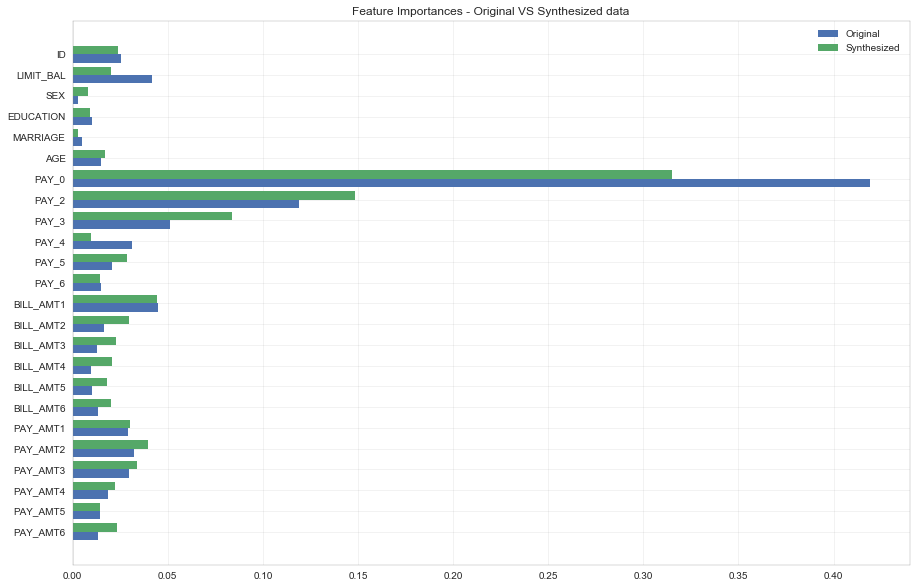

<Figure size 576x396 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(15,10), sharex=True, sharey=False)

features = list(fi_orig.keys())
y_pos = np.arange(len(fi_orig))

ho = ax.barh(y_pos + 0.2, list(fi_orig.values()), height=0.4, align='center')
hs = ax.barh(y_pos - 0.2, list(fi_synth.values()), height=0.4, align='center')

ax.legend([ho, hs], ['Original', 'Synthesized'])
ax.set_yticks(y_pos)
ax.set_yticklabels(fi_orig.keys())
ax.invert_yaxis()
ax.set_title('Feature Importances - Original VS Synthesized data')

plt.show()
plt.savefig('feature_importances.pdf', format='pdf')

In [166]:
best_orig_model = h2o.get_model('StackedEnsemble_AllModels_AutoML_20191202_163919')
best_synth_model = h2o.get_model('XGBoost_1_AutoML_20191202_170417')


In [169]:
df_pred_orig = best_orig_model.predict(train_orig).as_data_frame()
df_pred_synth = best_synth_model.predict(train_orig).as_data_frame()
df_orig = train_orig.as_data_frame()


stackedensemble prediction progress: |████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [211]:
df_pred_synth

,predict,p0,p1
0,1,0.280336,0.719664
1,0,0.912534,0.087466
2,0,0.874616,0.125384
3,0,0.792360,0.207640
4,0,0.976953,0.023047
...,...,...,...
29995,0,0.991261,0.008739
29996,0,0.980543,0.019457
29997,1,0.006303,0.993697
29998,0,0.981031,0.018969


In [219]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss

df_orig = train_orig.as_data_frame()

for i in np.concatenate((range(5), range(18, 22))):
    print('\nMODEL #{}\tOrig\tSynth\tDiff'.format(i+1))
    best_orig_model = h2o.get_model(models_orig[i])
    best_synth_model = h2o.get_model(models_synth[i])
    
    df_pred_orig = best_orig_model.predict(train_orig).as_data_frame()
    df_pred_synth = best_synth_model.predict(train_orig).as_data_frame()

    metrics = [accuracy_score, f1_score, precision_score, recall_score]
    metrics_prob = [roc_auc_score, log_loss]

    for metric in metrics:
        m_orig = metric(df_orig[y], df_pred_orig['predict'])
        m_synth = metric(df_orig[y], df_pred_synth['predict'])
        m_diff = m_orig - m_synth
        print('{}\t{:.4f}\t{:.4f}\t{:.4f}'.format(str(metric).split()[1].upper(), m_orig, m_synth, m_diff))

    for metric in metrics_prob:
        m_synth = metric(df_orig[y], df_pred_orig['p1'])
        m_synth = metric(df_orig[y], df_pred_synth['p1'])
        m_diff = m_orig - m_synth
        print('{}\t{:.4f}\t{:.4f}\t{:.4f}'.format(str(metric).split()[1].upper(), m_orig, m_synth, m_diff))




MODEL #1	Orig	Synth	Diff
stackedensemble prediction progress: |████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
ACCURACY_SCORE	0.8264	0.7951	0.0313
F1_SCORE	0.6210	0.5391	0.0819
PRECISION_SCORE	0.6004	0.5365	0.0639
RECALL_SCORE	0.6432	0.5417	0.1014
ROC_AUC_SCORE	0.6432	0.7747	-0.1315
LOG_LOSS	0.6432	0.6492	-0.0061

MODEL #2	Orig	Synth	Diff
stackedensemble prediction progress: |████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
ACCURACY_SCORE	0.8385	0.7870	0.0515
F1_SCORE	0.6349	0.5380	0.0970
PRECISION_SCORE	0.6351	0.5171	0.1180
RECALL_SCORE	0.6347	0.5606	0.0741
ROC_AUC_SCORE	0.6347	0.7733	-0.1386
LOG_LOSS	0.6347	0.6480	-0.0133

MODEL #3	Orig	Synth	Diff
xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
ACCURACY_SCORE	0.8080	0.7897

In [218]:
df_pred_orig['p1']

0        0.682848
1        0.425281
2        0.114159
3        0.132716
4        0.093284
           ...   
29995    0.090554
29996    0.133151
29997    0.729974
29998    0.236882
29999    0.168521
Name: p1, Length: 30000, dtype: float64

In [217]:
roc_auc_score(df_pred_orig['p1'].values, df_orig[y].values)

ValueError: continuous format is not supported